In [152]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gs
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
ls /glade/scratch/jsauer/ForPeople/ForCAMS/

FE_CBL2m_Ug5.0  FE_CBL2m_Ug5.2  FE_CBL2m_Ug5.4  FE_CBL2m_Ug5.6  FE_example.0
FE_CBL2m_Ug5.1  FE_CBL2m_Ug5.3  FE_CBL2m_Ug5.5  FE_CBL2m_Ug5.7


In [26]:
sim_files = sorted(glob("/glade/scratch/jsauer/ForPeople/ForCAMS/FE_CBL2m_Ug5.*"))
data_file = "/glade/scratch/jsauer/ForPeople/ForCAMS/FE_CBL2m_Ug5.0"
dses = []
for sim_file in sim_files:
    dses.append(xr.open_dataset(sim_file))

In [107]:
dses[0]

<xarray.Dataset>
Dimensions:                (srcDim: 8, locDim: 3, kDim: 15, jDim: 30, iDim: 30,
                            timeDim: 240)
Dimensions without coordinates: srcDim, locDim, kDim, jDim, iDim, timeDim
Data variables:
    srcAuxScLocation       (srcDim, locDim) float64 ...
    srcAuxScMassSpecValue  (srcDim) float64 ...
    structureMask          (kDim, jDim, iDim) float64 ...
    xPos                   (kDim, jDim, iDim) float32 ...
    yPos                   (kDim, jDim, iDim) float32 ...
    zPos                   (kDim, jDim, iDim) float32 ...
    u                      (timeDim, kDim, jDim, iDim) float32 1.098 ... 2.672
    v                      (timeDim, kDim, jDim, iDim) float32 ...
    w                      (timeDim, kDim, jDim, iDim) float32 ...
    q_CH4                  (timeDim, kDim, jDim, iDim) float32 1e-09 ... 1e-09

In [90]:
np.max([ds["w"][:, 1].min() for ds in dses])

-0.8380976319313049

MovieWriter ffmpeg unavailable; using Pillow instead.


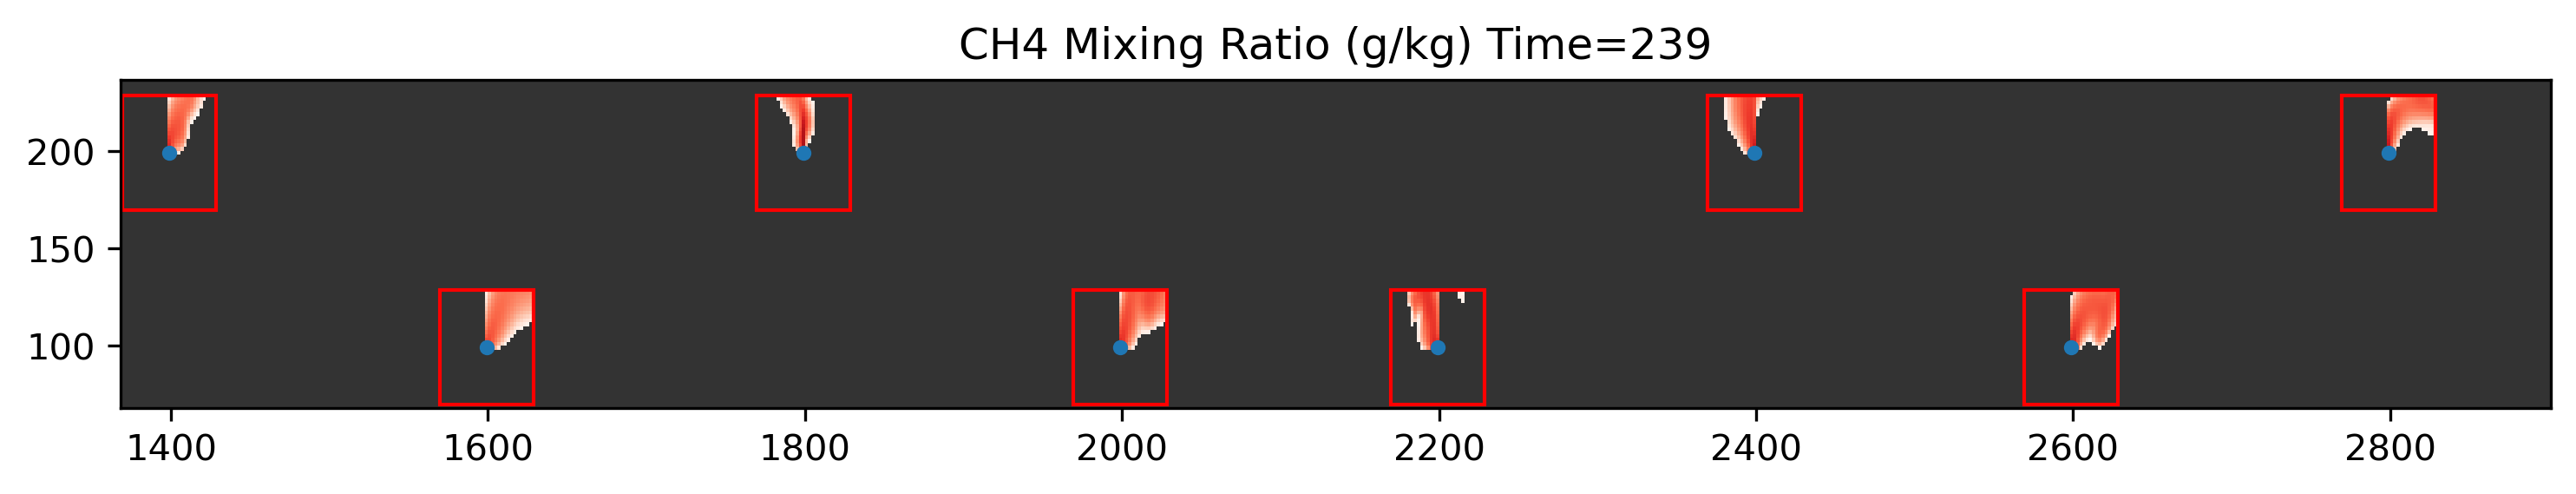

In [163]:
fig, ax = plt.subplots(figsize=(10, 2), dpi=300)
pcs = []
i = 0
for ds in dses:
    qch4_gkg = ds["q_CH4"][i,1] * 1000
    #plt.contour(ds["yPos"][0], ds["xPos"][0], np.sqrt(ds["u"][140, 1] ** 2 + ds["v"][140, 1] ** 2), np.arange(0, 5), vmin=0, vmax=4,
    #            cmap="Blues")
    pcs.append(plt.pcolormesh(ds["yPos"][0], ds["xPos"][0], np.ma.array(qch4_gkg, mask=qch4_gkg<0.001),norm=LogNorm(vmin=0.001, vmax=1),
                       cmap="Reds"))
    rect = Rectangle((ds["yPos"][0, 0, 0] + 0.5, ds["xPos"][0, 0, 0] + 0.5), ds["yPos"].max() - ds["yPos"].min() + 1, ds["xPos"].max() - ds["xPos"].min() + 1, edgecolor='red', facecolor="none")
    ax.add_patch(rect)
plt.scatter(ds["srcAuxScLocation"][:, 1], ds["srcAuxScLocation"][:, 0], 10)
ax.set_facecolor("0.2")
ax.set_title(f"CH4 Mixing Ratio (g/kg) Time={i:d}")
plt.tight_layout()
def update(i):
    for d, ds in enumerate(dses):
        qch4_gkg = ds["q_CH4"][i,1] * 1000
        qch4_gkg_ma = np.ma.array(qch4_gkg, mask=qch4_gkg<0.001)
        pcs[d].set_array(qch4_gkg_ma.ravel())
    ax.set_title(f"CH4 Mixing Ratio (g/kg) Time={i:d}")
    return pcs

anim = animation.FuncAnimation(fig, update, interval=100, frames=240, blit=False)
anim.save("ch4_anim.gif")
plt.show()

In [162]:
ds["yPos"][0, 0, 0]

<xarray.DataArray 'yPos' ()>
array(2769., dtype=float32)
Attributes:
    units:    m

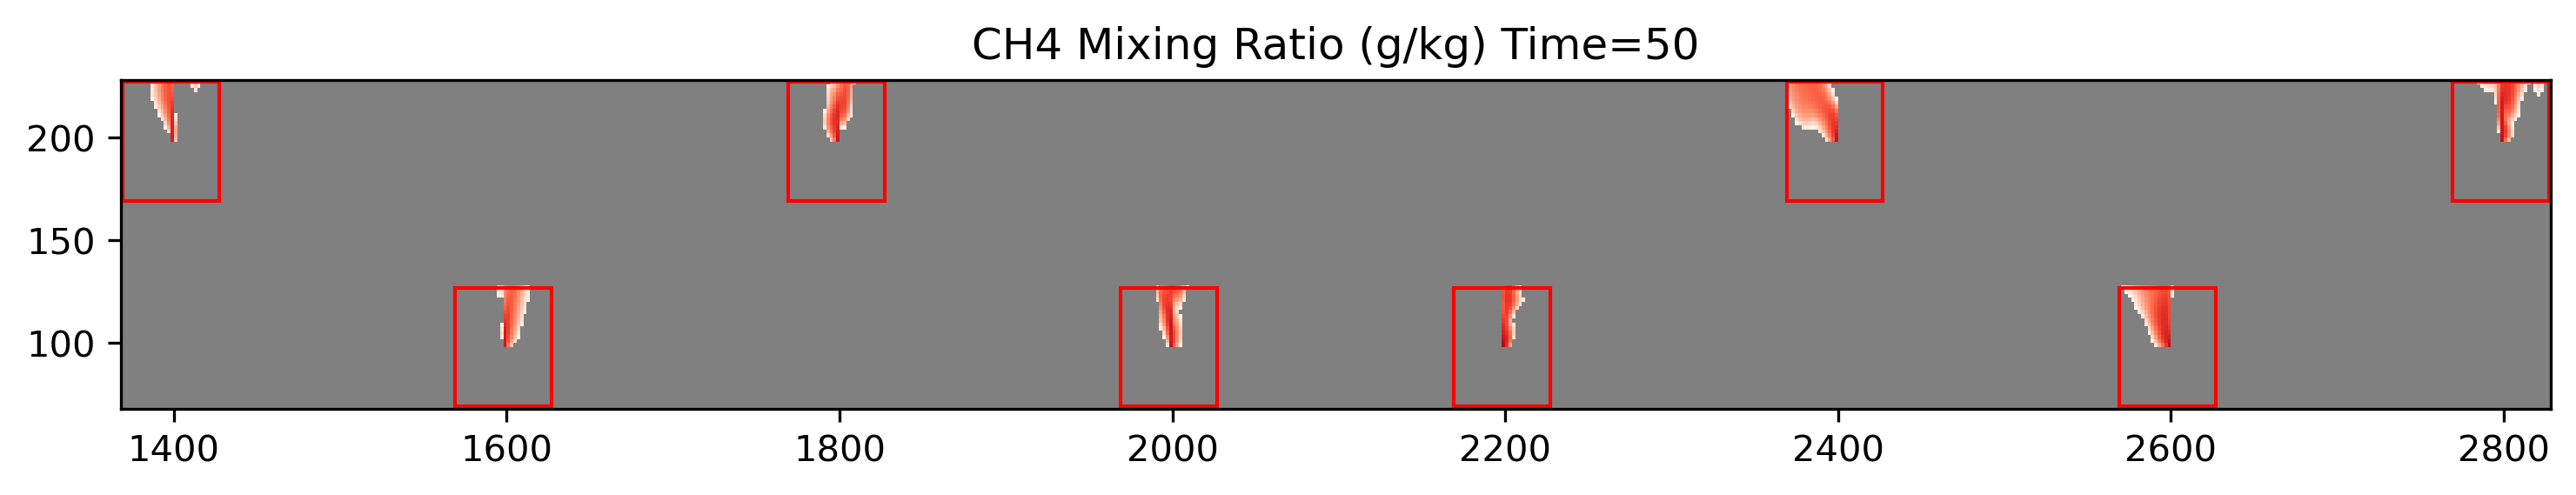

In [160]:
fig, ax = plt.subplots(figsize=(10, 2), dpi=300)
pcs = []
i = 50
for ds in dses:
    qch4_gkg = ds["q_CH4"][i,1] * 1000
    #plt.contour(ds["yPos"][0], ds["xPos"][0], np.sqrt(ds["u"][140, 1] ** 2 + ds["v"][140, 1] ** 2), np.arange(0, 5), vmin=0, vmax=4,
    #            cmap="Blues")
    pcs.append(plt.pcolormesh(ds["yPos"][0], ds["xPos"][0], np.ma.array(qch4_gkg, mask=qch4_gkg<0.001),norm=LogNorm(vmin=0.001, vmax=1),
                       cmap="Reds", lw=0.01))
    rect = Rectangle((ds["yPos"][0, 0, 0], ds["xPos"][0, 0, 0]), ds["yPos"].max() - ds["yPos"].min(), ds["xPos"].max() - ds["xPos"].min(), edgecolor='red', facecolor="none")
    ax.add_patch(rect)
#plt.scatter(ds["srcAuxScLocation"][:, 1], ds["srcAuxScLocation"][:, 0], 10)
ax.set_facecolor("0.5")
ax.set_title(f"CH4 Mixing Ratio (g/kg) Time={i:d}")
plt.tight_layout()


In [135]:
print(pcs[3].get_clip_box())

TransformedBbox(
    Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
    CompositeGenericTransform(
        CompositeGenericTransform(
            BboxTransformTo(
                Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)),
            Affine2D().scale(1.0)),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.051222222222222225, y0=0.19027777777777777, x1=0.9821963470319635, y1=0.8199999999999998),
                BboxTransformTo(
                    TransformedBbox(
                        Bbox(x0=0.0, y0=0.0, x1=10.0, y1=2.0),
                        Affine2D().scale(300.0)))))))


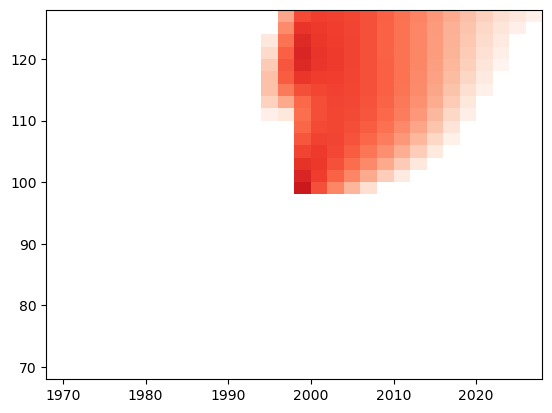

In [164]:
ds = dses[0]
i = 180
qch4_gkg = ds["q_CH4"][i,1] * 1000
plt.pcolormesh(ds["yPos"][0], ds["xPos"][0], np.ma.array(qch4_gkg, mask=qch4_gkg<0.001),norm=LogNorm(vmin=0.001, vmax=1),
                       cmap="Reds")

In [104]:
dir(pc)

['_A',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_antialiaseds',
 '_axes',
 '_bbox',
 '_bcast_lwls',
 '_callbacks',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_convert_mesh_to_paths',
 '_convert_mesh_to_triangles',
 '_coordinates',
 '_default_contains',
 '_edge_default',
 '_edge_is_mapped',
 '_edgecolors',
 '_face_is_mapped',
 '_facecolors',
 '_fully_clipped_to_axes',
 '_get_default_antialiased',
 '_get_default_edgecolor',
 '_get_default_facecolor',
 '_get_default_linewidth',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_id_norm',
 '_i

In [ ]:
fig, ax = plt.subplots(figsize=(10, 1), dpi=300)
ax.set_xlim(1368, 2828)
ax.set_ylim(68.0, 228.0)
ax.set_facecolor("0.2")


In [55]:
2800 - 1400

1400

In [56]:
220 - 80

140

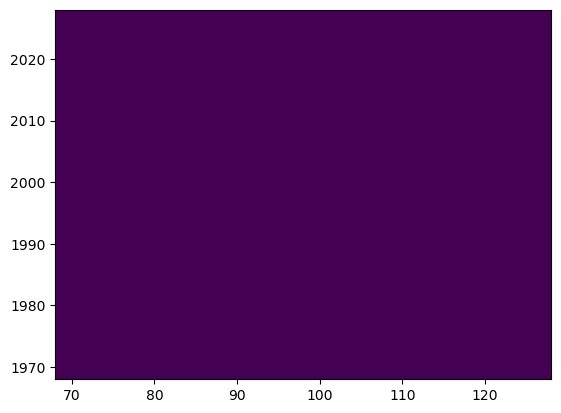

In [15]:
plt.pcolormesh(ds["xPos"][0], ds["yPos"][0], ds["structureMask"][3])

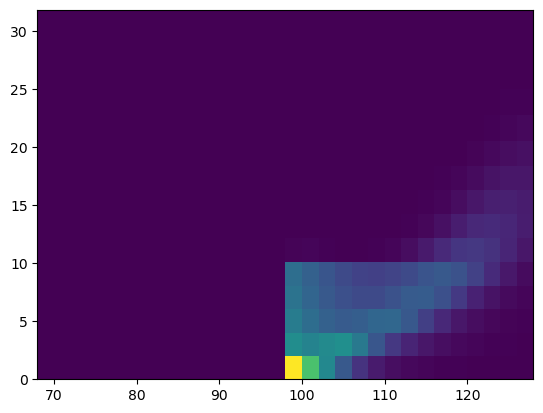

In [16]:
plt.pcolormesh(ds["xPos"][:, 15], ds["zPos"][:, 15], ds["q_CH4"][100, :, 15])

In [19]:
plt.plot(ds["q_CH4"][:, 0, 40, 5])

IndexError: index 40 is out of bounds for axis 0 with size 30

In [22]:
ds["srcAuxScLocation"].values

array([[9.900e+01, 1.999e+03, 5.000e-01],
       [1.990e+02, 1.799e+03, 5.000e-01],
       [9.900e+01, 1.599e+03, 5.000e-01],
       [1.990e+02, 1.399e+03, 5.000e-01],
       [9.900e+01, 2.199e+03, 5.000e-01],
       [1.990e+02, 2.399e+03, 5.000e-01],
       [9.900e+01, 2.599e+03, 5.000e-01],
       [1.990e+02, 2.799e+03, 5.000e-01]])